1. import torch:

    PyTorch is a Python-based scientific computing package serving two broad purposes:

    A replacement for NumPy to use the power of GPUs and other accelerators.
    An automatic differentiation library that is useful to implement neural networks.
    
    
2. import torchvision:

    A package that has 
    (a) "torchvision.datasets" : data loaders for common popular datasets such as ImageNet, CIFAR10, MNIST etc.
    (b) "torchvision.datasets" : data transformers for images, viz. and 
    (c) "torchvision.utils.data.Dataloader" : for loading datasets into batches by reshuffling(if chosen True)
    (d) model architectures
    
    
3. import numpy as np:

    one of the most powerful Python libraries that
    (a) contains a multi-dimensional array( 1-D, 2-D, 3-D ) and matrix data structures.
    (b) contains a large number of mathematical, algebraic, and transformation functions.
    (c) also contains random number generators.
    (d) Pandas objects rely heavily on NumPy objects. Essentially, Pandas extends Numpy.
    (e) can be used to add/remove/sort elements of an array
    (f) has several attributes such as "shape", "resize", "ndim"(to find the number of dimensions of an array),
          "concatenate" etc.
          
 
4. import pandas as pd:      MANIPULATION AND ANALYSIS of DATA

    A python library used for data "manipulation"(skillful handling, controlling) and analysis(breaking down something into
    pieces to learn)
    
    (a) Dataframe is the two-dimensional data structure (a combination of rows and columns).
    (b) Pandas dataframe can be created using various inputs like List, Dictionary, Series, Numpy ndarrays, and another
        Dataframe.
    (c) Each column in a dataframe is series. Series is a one-dimensional structure. A combination of two interrelated
        series is a dataframe. Each column heading is the label. It is also called a variable.
        
        
5. import os:
    
    By using this module we can interact with our operating system while we are working on a code. The os module will be
    installed as default, and if it is not present use the command pip install os-sys.
    
    (a) os.getcwd() - To know the current working directory (to know where the python script is running)
    (b) os.chdir() - To change the current working directory. The path to which it has to be changed can be specified
                        inside the brackets.
    (c) os.listdir() - To list the directories present inside the specified path.
    (d) os.path.join() - To create a directory inside an already existing directory.
    (e) os.rmdir() - To remove the directory specified in the path inside the brackets.
    (f) os.remove() - 
    

6. import re:

    
    
    
    
    
    
    
    

    
    

# 1. Loading and Pre-processing data

In [1]:
import torch       
import torchvision # this package consists of popular datasets, model architectures and common image transformations for CV
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, models, transforms

import numpy as np
import pandas as pd
import csv
import os
import re
import natsort
from PIL import Image
from matplotlib import pyplot as plt

print(os.getcwd())

C:\Users\vaibh\Desktop\Image_Classification_Practice


In [2]:
## This is my data.py file

class ChristmasImages(Dataset):                    # Dataset class for reading the images

    # for bigger datasets it can be necessary to just store the path and load each element in getitem.

    def __init__(self, path, training):      #init function loads the data
        super().__init__()

        # If training == True, path contains subfolders
        # containing images of the corresponding classes
        # If training == False, path directly contains
        # the test images for testing the classifier

        self.training = training
        self.path = path
        self.tensor_image = {}
        
        self.train_transform = transforms.Compose([
            transforms.Resize(144),
            transforms.CenterCrop(128),
            transforms.RandomRotation(degrees = (-180,180)),
            transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.1, hue=0.1),
            transforms.RandomHorizontalFlip(),
            transforms.GaussianBlur(3, sigma=(0.1, 2.0)),
            transforms.ToTensor(),
            transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])])

        self.val_transform = transforms.Compose([
            transforms.Resize(144),
            transforms.CenterCrop(128),
            transforms.ToTensor(),
            transforms.Normalize(mean = [0.485, 0.456, 0.406], std = [0.229, 0.224, 0.225])])

        if self.training == True:
            self.dataset = datasets.ImageFolder(path + './dataset/train',transform = self.train_transform)
        else:
            self.path = path
            self.unsorted_image = os.listdir(self.path)
            self.sorted_image = natsort.natsorted(self.unsorted_image)

    def __len__(self):
        return len(self.dataset.samples)



    def __getitem__(self, index):                   #getitem function that returns a certain item given an id < length
        # If self.training == False, output (image, )
        # where image will be used as input for your model
        if self.training == True:
            img = self.dataset[index][0]
            label = self.dataset[index][1]
            return (img,label )
        else:
            img_loc = os.path.join(self.path,
                                   self.sorted_image[index])
            # opening image using cv2 function
            #            image = cv2.imread(img_loc)

            # opening image with PIL package
            img = Image.open(img_loc).convert("RGB")
            img = self.val_transform(img)
            return (img, )
        raise NotImplementedError
        
        

In [8]:
christmas = ChristmasImages(r'C:\Users\vaibh\Desktop\Image_Classification_Practice', training = True)
christmas.__len__()
#christmas.__getitem__()

3726

In [30]:
train_dataset = ChristmasImages(r'C:\Users\vaibh\Desktop\Image_Classification_Practice', training = True)
trainloader = DataLoader(train_dataset,batch_size = 32, shuffle = True,pin_memory=True)

train_batch = next(iter(trainloader))

print(type(train_batch))              # <class 'list'> First element of list is a list of Image Tensor 
print(len(train_batch))               # 2  ( )
print(type(train_batch[1]))
print(train_batch[0].shape)           # shape of all images in a batch
print(train_batch[1].shape)
print(train_batch[0][0].shape)        # Returns shape of 1st image out of 32 images
print(train_batch[1][0])              # Returns label of 1st image out of 32 images

<class 'list'>
2
<class 'torch.Tensor'>
torch.Size([32, 3, 128, 128])
torch.Size([32])
torch.Size([3, 128, 128])
tensor(5)


32
torch.Size([32, 3, 128, 128])
tensor([5, 3, 4, 0, 4, 7, 0, 2, 0, 1, 5, 5, 4, 2, 0, 6, 0, 7, 0, 4, 4, 4, 4, 3,
        4, 5, 2, 0, 5, 5, 5, 0])


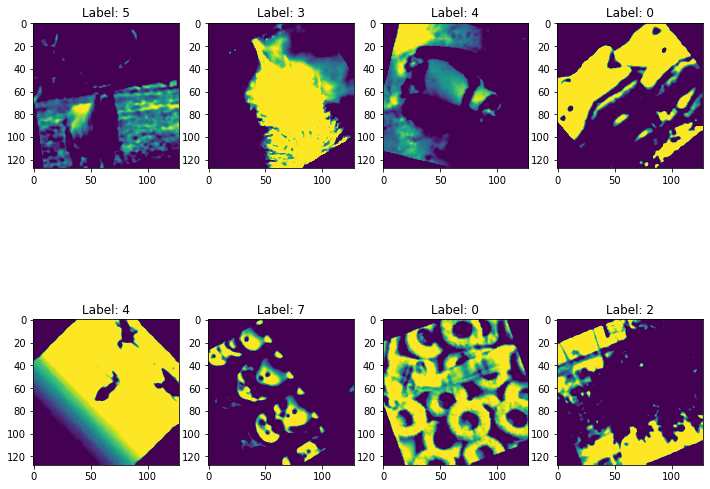

In [55]:
train_images = train_batch[0]
train_labels = train_batch[1]

#Checking image type and shape of training dataset
#print(type(train_batch))
print(len(train_labels))
print(train_images.shape)
print(train_labels)
#print(train_images[0,0])

#Image Show of Training images
plt.figure(figsize=(12,10)) # specifying the overall grid size
for i in range(8):
    plt.subplot(2, 4, i+1)    # the number of images in the grid is 2*4 (8)
    plt.imshow(train_images[i][0], vmin=0., vmax=1.)
    plt.title('Label: {}'.format(train_labels[i]))


In [62]:
# This is utils.py file

class TestSet(Dataset):
    
    def __init__(self, path):
        super().__init__()
        self.dataset = ChristmasImages(path + './dataset/val', training=False)
        
        with open(path + './dataset/val.csv') as file:
            reader = csv.reader(file)
            next(reader)
            labels = {}
            for row in reader:
                labels[int(row[0])] = int(row[1])
        self.labels = labels
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        image = self.dataset[idx][0]
        label = self.labels[idx]
        return image, label

160
<class 'list'>
2
torch.Size([1, 3, 128, 128])
torch.Size([1])


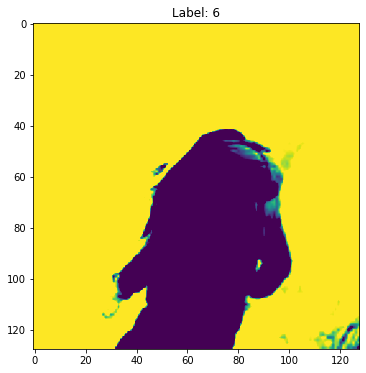

In [66]:
path = r'C:\Users\vaibh\Desktop\Image_Classification_Practice'
testset = TestSet(path)
val_batchsize = 1
loader = DataLoader(TestSet(path), batch_size = 1, shuffle = True,pin_memory=True)

#Iterating through the test Dataloader
val_batch = next(iter(loader))
val_images = val_batch[0]
val_labels = val_batch[1]

#Checking image type and shape of validation dataset
print(len(loader))
print(type(val_batch))
print(len(val_batch))
print(val_images.size())
print(val_labels.size())

plt.figure(figsize=(8,6)) # specifying the overall grid size
for i in range(val_batchsize):
    plt.subplot(1, val_batchsize, i+1)
    plt.imshow(val_images[i, 0], vmin=0., vmax=1.)
    plt.title('Label: {}'.format(val_labels[i]))

# Model Architecture

In [ ]:
import torch
import torch.nn as nn

class Network(nn.Module):

    def __init__(self):
        super().__init__()

        #############################
        # Initialize your network
        self.cnn_layer1 = nn.Sequential(
            nn.Conv2d(3,16,kernel_size = 3,stride=1, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(inplace=True),
            #nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(16, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True))

        self.cnn_layer2 = nn.Sequential(
            nn.Conv2d(64, 64, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(64),
            nn.ReLU(inplace=True))

        self.cnn_layer3 = nn.Sequential(
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(128),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(256),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.cnn_layer4 =  nn.Sequential(
            nn.Conv2d(256, 512, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(512),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2))

        self.linear_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(512*8*8, 400),
            nn.ReLU(inplace=True),
            nn.Dropout(0.25),
            nn.Linear(400, 200),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Linear(200, 80),
            nn.Dropout(0.4),
            nn.ReLU(inplace=True),
            nn.Dropout(0.4),
            nn.Linear(80, 8)

        )

        #############################

    def forward(self, x):

        #############################
        # Implement the forward pass
        x1 = self.cnn_layer1(x)
        x2 = self.cnn_layer2(x1)
        x3 = x2 + x1
        x4 = self.cnn_layer3(x3)
        x5 = self.cnn_layer4(x4)
        #x = x.view(x.size(0), -1)
        x6 = self.linear_layers(x5)
        return x6
        #############################

        pass

    def save_model(self):

        #############################
        # Saving the model's weitghts
        # Upload 'model' as part of
        # your submission
        # Do not modify this function
        #############################

        torch.save(self.state_dict(), 'model')                        # saves and loads only the model parameters


In [18]:
# Here I have imported my VGG16 network defined in model.py file

from model import Network

In [19]:
net = Network()
print(net)

# Loss function and optomizer

loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9, nesterov = True)

Network(
  (vgg16): VGG(
    (features): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): ReLU(inplace=True)
      (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (3): ReLU(inplace=True)
      (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (6): ReLU(inplace=True)
      (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (8): ReLU(inplace=True)
      (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (11): ReLU(inplace=True)
      (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (13): ReLU(inplace=True)
      (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (15): ReLU(inplace=True)
      (16): 

In [9]:
# Training the network

num_epochs = 30
training_losses = []

for epoch in range(num_epochs):
    running_training_losses = 0.0
    for items in trainloader:
        train_images, train_labels = items

        # Forward pass
        outputs = net(train_images)
        train_loss = loss_function(outputs, train_labels)

        # Backward and optimize
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()
        
        running_training_losses += train_loss.item()
    train_loss_value = running_training_losses/len(trainloader)
    training_losses.append(train_loss_value)
    print('Epoch: ', epoch, 'Training loss: %.3f' % train_loss_value)

Epoch:  0 Training loss: 1.386
Epoch:  1 Training loss: 1.074
Epoch:  2 Training loss: 0.995
Epoch:  3 Training loss: 0.972
Epoch:  4 Training loss: 0.947
Epoch:  5 Training loss: 0.898
Epoch:  6 Training loss: 0.893
Epoch:  7 Training loss: 0.857
Epoch:  8 Training loss: 0.861
Epoch:  9 Training loss: 0.833
Epoch:  10 Training loss: 0.829
Epoch:  11 Training loss: 0.818
Epoch:  12 Training loss: 0.799
Epoch:  13 Training loss: 0.784
Epoch:  14 Training loss: 0.767
Epoch:  15 Training loss: 0.764
Epoch:  16 Training loss: 0.736
Epoch:  17 Training loss: 0.732
Epoch:  18 Training loss: 0.733
Epoch:  19 Training loss: 0.719
Epoch:  20 Training loss: 0.730
Epoch:  21 Training loss: 0.697
Epoch:  22 Training loss: 0.697
Epoch:  23 Training loss: 0.669
Epoch:  24 Training loss: 0.677
Epoch:  25 Training loss: 0.684
Epoch:  26 Training loss: 0.663
Epoch:  27 Training loss: 0.660
Epoch:  28 Training loss: 0.635
Epoch:  29 Training loss: 0.641


In [10]:
# Saving the trained network parameters which will be used to test of validation and test dataset

net.save_model()

In [20]:
# This is evaluate.py file to test accuracy of trained network on validation dataset

import torch
from torch.utils.data import Dataset, DataLoader

from model import Network
from utils import TestSet, evaluate

In [21]:
path = r'C:\Users\vaibh\Desktop\Deep Learning Exercises\Exercise_8_Classification_Challenge\evaluation\dataset'

 #dataset location

model = Network().eval()
model.load_state_dict(torch.load('model'))

loader = DataLoader(TestSet(path), batch_size=1)

print(evaluate(model, loader))

0,7
1,5
2,1
3,5
4,2
5,0
6,5
7,3
8,4
9,3
10,0
11,3
12,4
13,6
14,1
15,3
16,2
17,2
18,7
19,3
20,7
21,3
22,4
23,7
24,0
25,6
26,4
27,2
28,5
29,7
30,2
31,0
32,2
33,4
34,2
35,1
36,3
37,5
38,6
39,2
40,0
41,2
42,6
43,6
44,3
45,5
46,2
47,4
48,0
49,7
50,6
51,1
52,4
53,1
54,4
55,0
56,6
57,3
58,6
59,1
60,0
61,7
62,5
63,3
64,1
65,2
66,0
67,2
68,7
69,3
70,2
71,4
72,4
73,0
74,3
75,4
76,7
77,3
78,6
79,7
80,4
81,0
82,0
83,4
84,5
85,6
86,2
87,1
88,1
89,7
90,5
91,7
92,0
93,5
94,4
95,3
96,4
97,4
98,7
99,5
100,1
101,6
102,4
103,3
104,7
105,1
106,5
107,5
108,3
109,1
110,6
111,1
112,5
113,4
114,7
115,0
116,3
117,7
118,5
119,1
120,7
121,3
122,5
123,6
124,6
125,6
126,1
127,6
128,4
129,6
130,3
131,3
132,2
133,4
134,7
135,1
136,0
137,3
138,1
139,0
140,6
141,6
142,0
143,0
144,2
145,7
146,5
147,1
148,3
149,4
150,2
151,6
152,7
153,7
154,5
155,0
156,5
157,6
158,2
159,1
0.88125


In [13]:
import numpy as np

#To load saved model uncomment
#net.load_state_dict(torch.load('model'))

net.eval()
prediction = []

# getting predictions on test set and measuring the performance
correct_count, total_count = 0, 0
for data,labels in loader:
    for i in range(len(labels)):
        img = data[i].view(1, 3, 128, 128)
        with torch.no_grad():
            val_output = net(img)


        ps = torch.exp(val_output)
        probab = list(val_output.cpu()[0])
        pred_label = probab.index(max(probab))
        prediction.append(pred_label)
        true_label = labels.cpu()[i]
        if(true_label == pred_label):
            correct_count += 1
        total_count += 1

print("Number Of Images Tested =", total_count)
print("\nModel Accuracy =", (correct_count/total_count))

Number Of Images Tested = 160

Model Accuracy = 0.88125


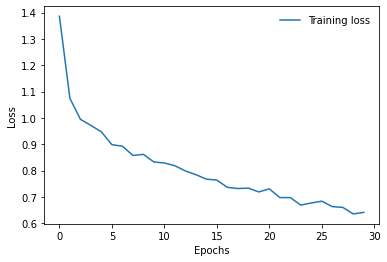

In [22]:
plt.plot( training_losses, label='Training loss')
#plt.plot( validation_losses, label='Validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(frameon = False)
plt.show()